In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') # sets plot style

In [3]:
dataset = pd.read_csv("Netflix.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


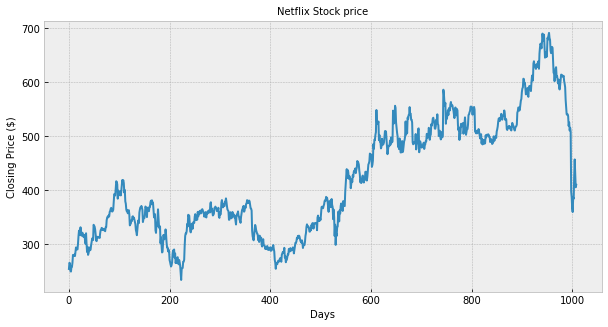

In [4]:
plt.figure(figsize=(10,5))
plt.title('Netflix Stock price', fontsize = 10)
plt.xlabel('Days', fontsize= 10)
plt.ylabel('Closing Price ($)', fontsize = 10)
plt.plot(dataset['Close'])
plt.show()

In [11]:
dataset = dataset[['Close']]
dataset.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [12]:
#Create a variable to predict 'x' days out into the future
upcoming_days = 30

#Create a new column (the target or dependent variable) shifted 'x' units/days up
dataset['Prediction'] = dataset[['Close']].shift(-upcoming_days)

#print the last few rows
dataset.tail()


,Close,Prediction
1004,427.140015,NaN
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [13]:
#Create the feature data set and print it.

X = np.array(dataset.drop(['Prediction'], 1))[:-upcoming_days]
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [14]:
# Create the target data set and print it.
y = np.array(dataset['Prediction'])[:-upcoming_days]
print(y)

[317.5      316.480011 306.700012 300.940002 320.350006 300.690002
 285.769989 295.350006 280.290009 283.670013 288.940002 293.970001
 288.850006 289.929993 298.070007 303.670013 309.25     311.649994
 307.779999 336.059998 334.519989 332.700012 327.769989 318.690002
 307.019989 305.76001  313.980011 311.76001  312.459991 313.299988
 313.359985 311.690002 320.089996 326.26001  326.890015 330.299988
 329.600006 326.459991 328.529999 326.130005 328.190002 325.220001
 324.179993 331.820007 331.619995 344.720001 349.290009 351.290009
 349.730011 353.540009 351.600006 359.929993 361.809998 365.799988
 367.450012 361.399994 360.570007 361.450012 363.829987 379.929993
 392.869995 391.980011 390.399994 404.980011 416.76001  415.440002
 411.089996 384.480011 399.390015 390.390015 395.420013 391.429993
 398.179993 390.519989 398.390015 408.25     418.970001 415.630005
 418.649994 413.5      395.799988 400.480011 379.480011 375.130005
 364.230011 361.049988 362.660004 357.320007 362.869995 363.08

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [16]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [17]:
#feature data,i.e all the rows from the original data set except the last 'x' days
x_future = dataset.drop(['Prediction'], 1)[:-upcoming_days]

#let's get the last 'x' rows
x_future = x_future.tail(upcoming_days) 

#then convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[646.909973],
       [657.580017],
       [682.609985],
       [679.330017],
       [687.400024],
       [691.690002],
       [682.02002 ],
       [678.799988],
       [659.200012],
       [654.059998],
       [658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ]])

In [18]:
#Show the decion treee model prediction
decision_tree_prediction = tree.predict(x_future)
print( decision_tree_prediction )

[614.090027 613.119995 597.98999  610.539978 591.059998 602.440002
 597.98999  591.150024 567.52002  553.289978 613.119995 539.849976
 611.       691.690002 525.690002 525.690002 405.600006 515.859985
 508.25     397.5      387.149994 387.149994 405.600006 386.700012
 405.600006 427.140015 457.130005 429.480011 405.600006 515.859985]


c:\users\omale happiness o\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


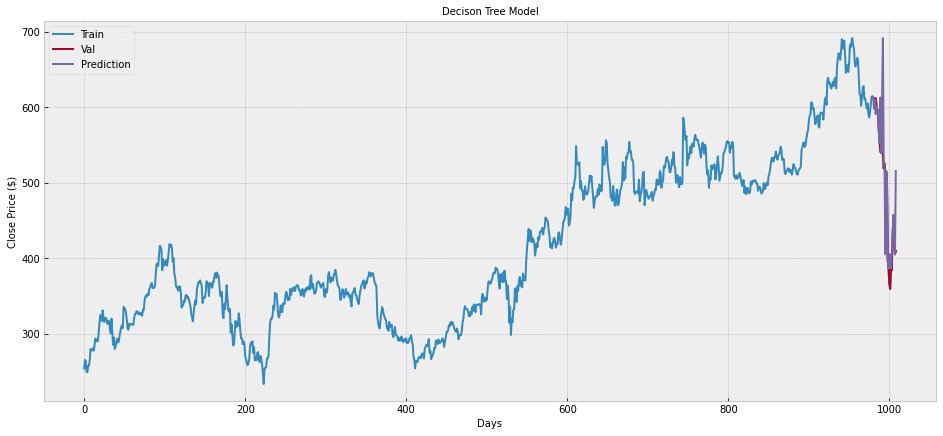

In [19]:
#visualizing the data
predictions = decision_tree_prediction

#we will plot the data here
valid =  dataset[X.shape[0]:]
#Create a new column called 'Predictions' that will hold the predicted prices
valid['Predictions'] = predictions 
plt.figure(figsize=(16,7))
plt.title('Decison Tree Model', fontsize=10)
plt.xlabel('Days',fontsize=10)
plt.ylabel('Close Price ($)',fontsize=10)
plt.plot(dataset['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper left')
plt.show()